In [24]:
%reload_ext autoreload
%autoreload 2

import fish_models
import inspect
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt


requested_model = "ClassificationModel_v0"

models_config = json.load(open("../buffer/models.json", "r"))
config = models_config[requested_model]

# Load Dataset
dset = fish_models.datasets.IoDataset.load_from_name(config["dataset"], verbose=True)

# Load model class
mod = fish_models.utils.load_class_from_string(config["model_class"])

# Get the arguments for the model and extract the raycast if it is needed.
args = config["model_args"]
if "raycast" in inspect.signature(mod.__init__).parameters:
    args["raycast"] = dset.raycast

# Initialize and train the model
model = mod(**config["model_args"])
model.train(dset, **config["train_args"])

# Store the model to buffer

storage_path = Path("../buffer") /config["path"]
if storage_path.exists():
    print(f"File exists and will be overwritten.")
zip_location = fish_models.ModelStorage.store(storage_path, model, verbose=True, overwrite=True)

Dataset already in storage, loading from /home/andi/blubber_workspace/tmp/fish_models/storage/datasets/lfftr_aav_4_2piw_10_2pif_rd2_mf10.pickle
dict_keys(['verbose', 'max_iter', 'hidden_layer_sizes'])
Iteration 1, loss = 7.29166196
Iteration 2, loss = 6.84582425
Iteration 3, loss = 6.81930853
Iteration 4, loss = 6.79500032
Iteration 5, loss = 6.77759737
Iteration 6, loss = 6.76833231
Iteration 7, loss = 6.76213111
Iteration 8, loss = 6.75681177
Iteration 9, loss = 6.75277971
Iteration 10, loss = 6.74918457
Iteration 11, loss = 6.74572998
Iteration 12, loss = 6.74265458
Iteration 13, loss = 6.73982576
Iteration 14, loss = 6.73700406
Iteration 15, loss = 6.73430564
Iteration 16, loss = 6.73222687
Iteration 17, loss = 6.72970860
Iteration 18, loss = 6.72762182
Iteration 19, loss = 6.72566669
Iteration 20, loss = 6.72377237
Iteration 21, loss = 6.72211411
Iteration 22, loss = 6.72056207
Iteration 23, loss = 6.71902463
Iteration 24, loss = 6.71801982
Iteration 25, loss = 6.71639951
Iteratio

/home/andi/.local/lib/python3.8/site-packages/scikit_learn-0.24.2-py3.8-linux-x86_64.egg/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


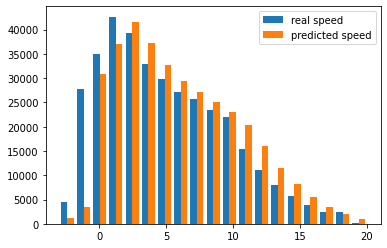

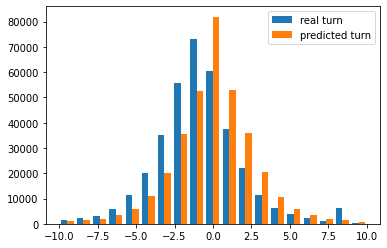

In [25]:
# TODO: This should be dependent on the models needs

size = dset["views"].shape[0]
actions = np.zeros((size, 2))

for i in range(size):
    actions[i] = model.choose_action(dset["views"][i])

plt.figure()
plt.hist([actions[:,0], dset["actions"][:,0]], bins=np.linspace(-3,20,20), label=["real speed", "predicted speed"])
plt.legend()

plt.figure()
plt.hist([actions[:,1], dset["actions"][:,1]], bins=np.linspace(-10,10,20), label=["real turn", "predicted turn"])
plt.legend()
plt.show()